In [2]:
import importlib.util
import numpy as np
from scipy.constants import c
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

interApi = lumapi.INTERCONNECT(hide = False)

In [6]:
waveguide = r"Waveguide.ldf"
y_branch = r"Y_Branch.dat"
acoplador = r"Acoplador Direcional.dat"

In [3]:
um = 1e-6
nm = 1e-9
valor_lambda = 1550*nm
start_wavelenth = 1500*nm
stop_wavelenth = 1600*nm
number_point = 10000

file = 'MZI_Real'

In [8]:
interApi.save(file)

In [15]:
ng = 4.3458796
FSR = [1*nm, 10*nm, 20*nm]

L1 = 110*um
L2 = np.zeros(len(FSR))

for i in range (len(FSR)):
    d_L = valor_lambda**2/(ng*FSR[i])
    L2[i] = L1 + d_L

    print(f'\u0394L = {d_L/um:.2f}\u03BCm\nComprimento maior = {L2[i]/um:.2f}\u03BCm\nComprimento menor = {L1/um:.2f}\u03BCm\n')

ΔL = 552.82μm
Comprimento maior = 662.82μm
Comprimento menor = 110.00μm

ΔL = 55.28μm
Comprimento maior = 165.28μm
Comprimento menor = 110.00μm

ΔL = 27.64μm
Comprimento maior = 137.64μm
Comprimento menor = 110.00μm



In [14]:
Lv = np.zeros(len(FSR))
radiu = 5*um

for i in range (len(FSR)):
    d_L = valor_lambda**2/(ng*FSR[i])
    Lv[i] = (L2[i] - 4*(L1-4*radiu)/3)/2

    print(f'Comprimento horizontal = {((L1-4*radiu)/3)/um:.2f}\u03BCm\nComprimento do raio = {radiu/um:.2f}\u03BCm\nComprimento vertical = {Lv[i]/um:.2f}\u03BCm\n')

Comprimento horizontal = 30.00μm
Comprimento do raio = 5.00μm
Comprimento vertical = 271.41μm

Comprimento horizontal = 30.00μm
Comprimento do raio = 5.00μm
Comprimento vertical = 22.64μm

Comprimento horizontal = 30.00μm
Comprimento do raio = 5.00μm
Comprimento vertical = 8.82μm



In [10]:
x_ona = 0
y_ona = 0

x_waveguide_maior = 25
y_waveguide_maior = 150

x_waveguide_menor = 25
y_waveguide_menor = 300

x_y_branch = -150
y_y_branch = 225

x_acoplador_direcional = 300
y_acoplador_direcional = 225

In [11]:
interApi.switchtolayout()

interApi.select('ONA')
interApi.delete()

interApi.addelement('Optical Network Analyzer')
interApi.set('name', 'ONA')
interApi.setposition('ONA', x_ona, y_ona)
interApi.set('number of input ports', 2)
interApi.set('input parameter', 'start and stop')
interApi.set('start frequency', c/start_wavelenth)
interApi.set('stop frequency', c/stop_wavelenth)
interApi.set('number of points', number_point)

In [12]:
interApi.switchtolayout()

interApi.select('WGD_maior')
interApi.delete()
interApi.select('WGD_menor')
interApi.delete()

interApi.addelement('MODE Waveguide')
interApi.set('name', 'WGD_maior')
interApi.setposition('WGD_maior', x_waveguide_maior, y_waveguide_maior)
interApi.set('load mode profile', True)
interApi.set('ldf filename', waveguide)
interApi.set('length', L2[2])

interApi.addelement('MODE Waveguide')
interApi.set('name', 'WGD_menor')
interApi.setposition('WGD_menor', x_waveguide_menor, y_waveguide_menor)
interApi.set('load mode profile', True)
interApi.set('ldf filename', waveguide)
interApi.set('length', L1[2])

In [13]:
interApi.switchtolayout()

interApi.select('Y_Branch')
interApi.delete()

interApi.addelement('Optical N Port S-Parameter')
interApi.set('name', 'Y_Branch')
interApi.setposition('Y_Branch', x_y_branch, y_y_branch)
interApi.set('load from file', True)
interApi.set('s parameters filename', y_branch)

In [14]:
interApi.switchtolayout()

interApi.select('Acoplador_Direcional')
interApi.delete()

interApi.addelement('Optical N Port S-Parameter')
interApi.set('name', 'Acoplador_Direcional')
interApi.setposition('Acoplador_Direcional', x_acoplador_direcional, y_acoplador_direcional)
interApi.set('load from file', True)
interApi.set('s parameters filename', acoplador)

In [15]:
interApi.switchtolayout()

interApi.connect('ONA', 'output', 'Y_Branch', 'in')
interApi.connect('Y_Branch', 'out1', 'WGD_maior', 'port 1')
interApi.connect('Y_Branch', 'out2', 'WGD_menor', 'port 1')
interApi.connect('WGD_maior', 'port 2', 'Acoplador_Direcional', 'port_00')
interApi.connect('WGD_menor', 'port 2', 'Acoplador_Direcional', 'port_10')
interApi.connect('Acoplador_Direcional', 'port_01', 'ONA', 'input 1')
interApi.connect('Acoplador_Direcional', 'port_11', 'ONA', 'input 2')

1.0

In [16]:
interApi.save(file)

In [17]:
interApi.run(1)

In [18]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1['mode 1 gain (dB)'])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2['mode 1 gain (dB)'])  


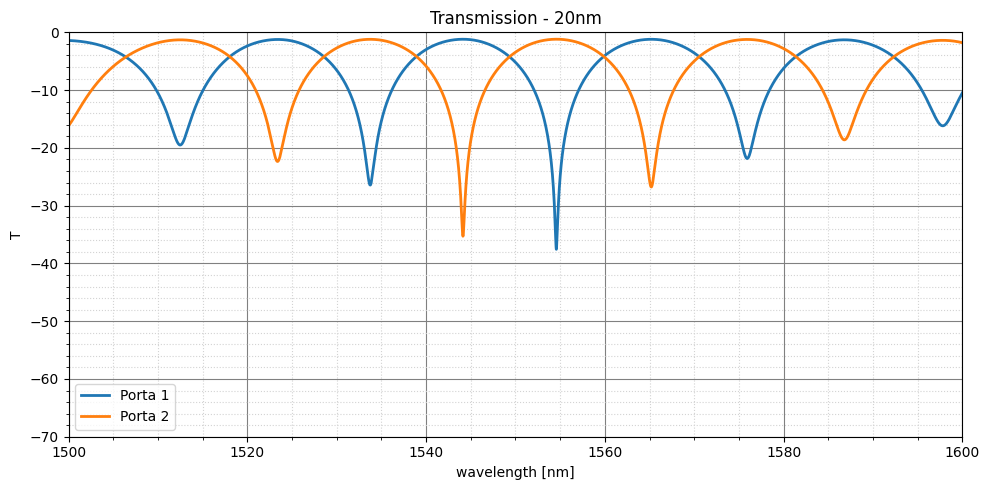

In [19]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.ylim([-70,0])
plt.title(r'Transmission - 20nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 20nm.png')
plt.show()

In [20]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_20 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_20 = np.array(FSR_1['mode 1 free spectral range (m)'])

wavelength_2_20 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_20 = np.array(FSR_2['mode 1 free spectral range (m)'])  

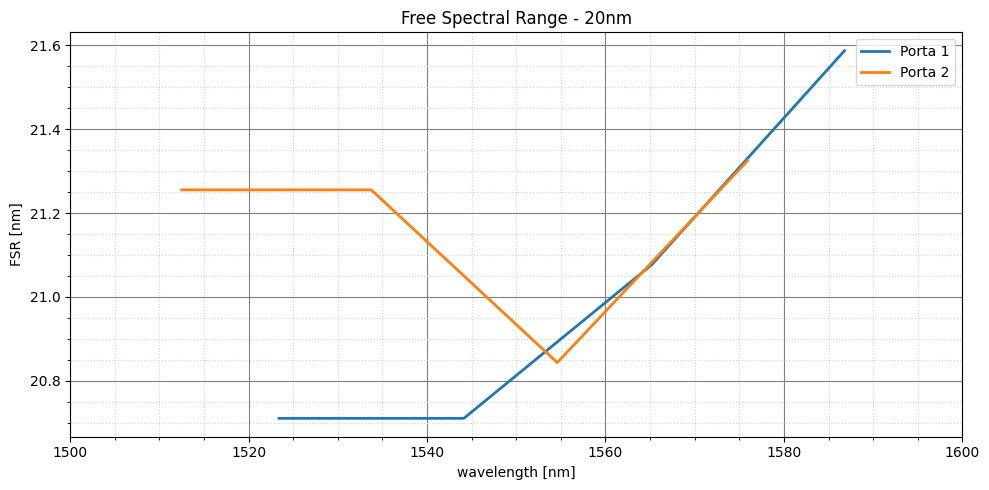

In [21]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

plt.plot(wavelength_1_20/nm, fsrplot_1_20/nm, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2_20/nm, fsrplot_2_20/nm, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range - 20nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 20nm.png')
plt.show()

In [22]:
interApi.switchtolayout()

interApi.select('WGD_maior')
interApi.set('length', L2[1])
interApi.select('WGD_menor')
interApi.set('length', L1[1])

In [23]:
interApi.save(file)

In [24]:
interApi.run(1)

In [25]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1['mode 1 gain (dB)'])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2['mode 1 gain (dB)'])

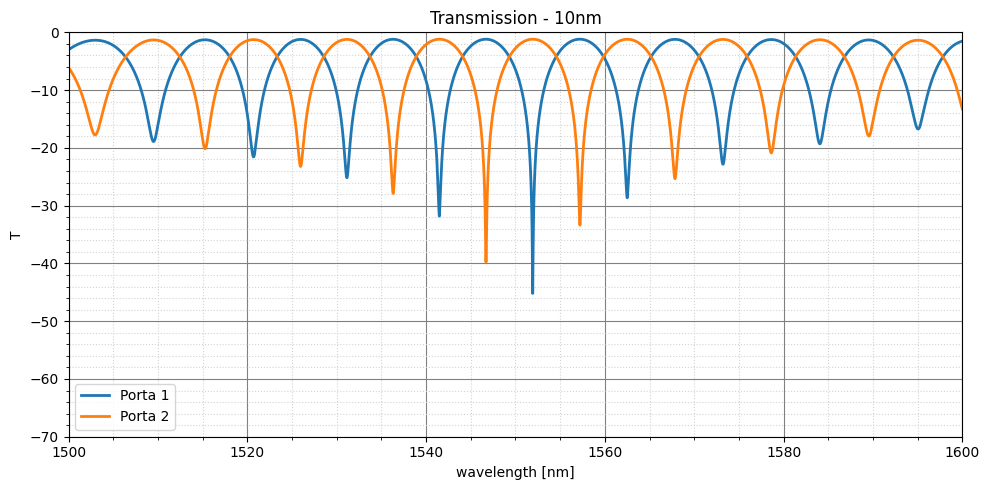

In [26]:
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.ylim([-70,0])
plt.title(r'Transmission - 10nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 10nm.png')
plt.show()

In [27]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_10 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_10 = np.array(FSR_1['mode 1 free spectral range (m)'])

wavelength_2_10 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_10 = np.array(FSR_2['mode 1 free spectral range (m)'])   

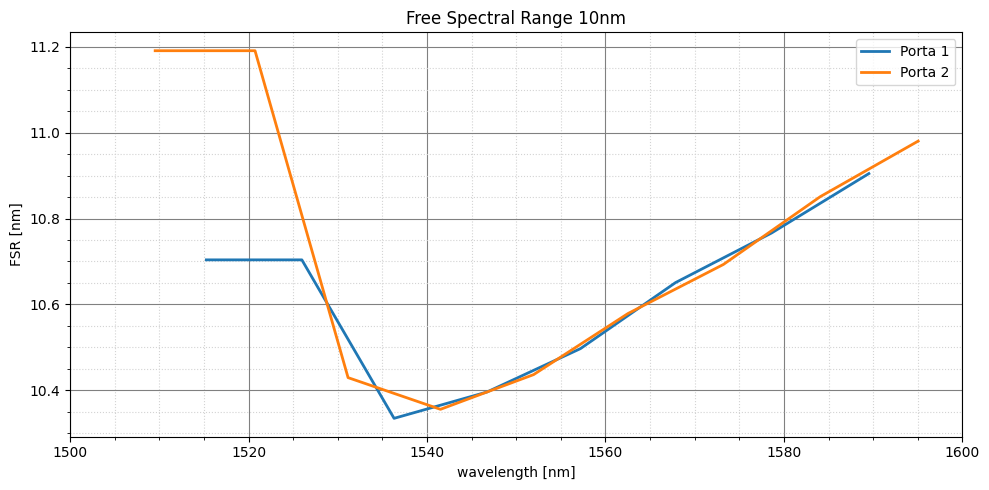

In [28]:
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(111)

plt.plot(wavelength_1_10/nm, fsrplot_1_10/nm, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2_10/nm, fsrplot_2_10/nm, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range 10nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 10nm.png')
plt.show()

In [29]:
interApi.switchtolayout()

interApi.select('WGD_maior')
interApi.set('length', L2[0])
interApi.select('WGD_menor')
interApi.set('length', L1[0])

In [30]:
interApi.save(file)

In [31]:
interApi.run(1)

In [32]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1['mode 1 gain (dB)'])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2['mode 1 gain (dB)'])


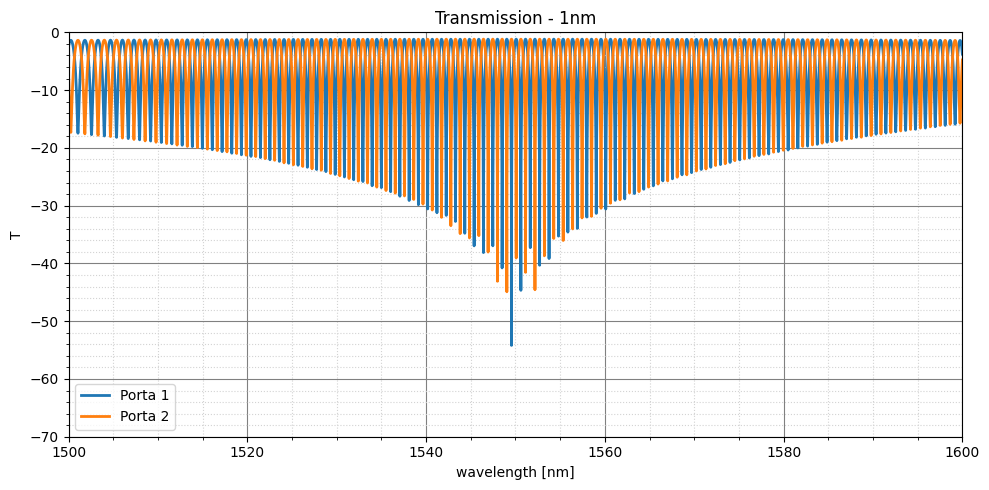

In [33]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.ylim([-70,0])
plt.title(r'Transmission - 1nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 1nm.png')
plt.show()

In [34]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_1 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_1 = np.array(FSR_1['mode 1 free spectral range (m)'])

wavelength_2_1 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_1 = np.array(FSR_2['mode 1 free spectral range (m)'])   

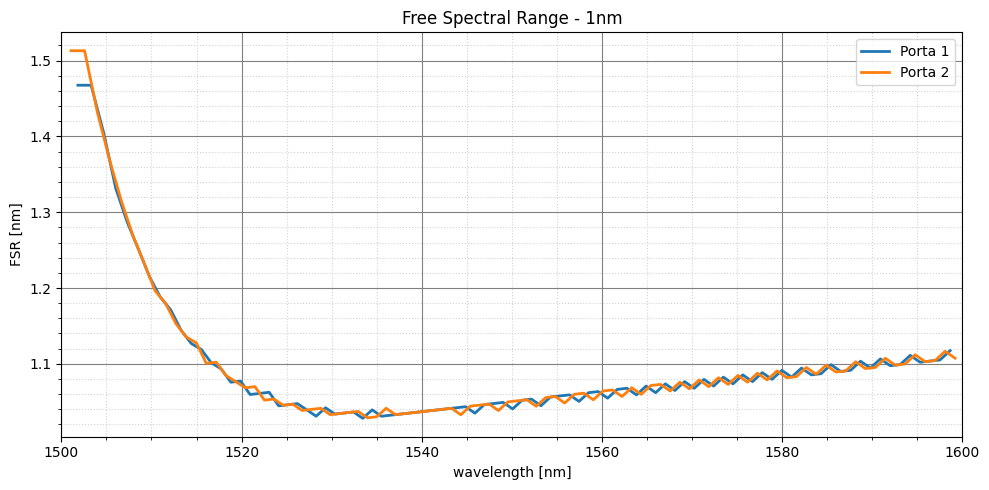

In [35]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)

plt.plot(wavelength_1_1/nm, fsrplot_1_1/nm, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2_1/nm, fsrplot_2_1/nm, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range - 1nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 1nm.png')
plt.show()

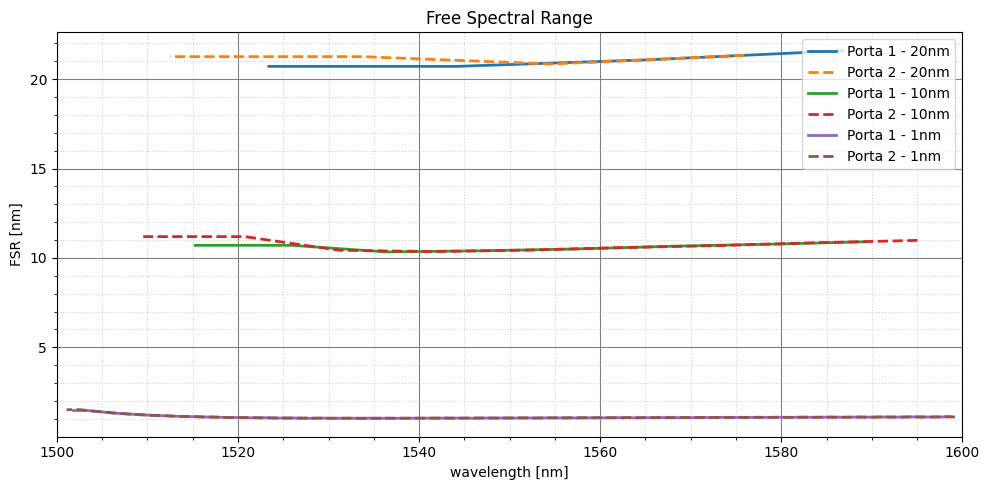

In [36]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(111)

plt.plot(wavelength_1_20/nm, fsrplot_1_20/nm, label = 'Porta 1 - 20nm', linewidth=2)
plt.plot(wavelength_2_20/nm, fsrplot_2_20/nm, label = 'Porta 2 - 20nm', linewidth=2, linestyle='--')
plt.plot(wavelength_1_10/nm, fsrplot_1_10/nm, label = 'Porta 1 - 10nm', linewidth=2)
plt.plot(wavelength_2_10/nm, fsrplot_2_10/nm, label = 'Porta 2 - 10nm', linewidth=2, linestyle='--')
plt.plot(wavelength_1_1/nm, fsrplot_1_1/nm, label = 'Porta 1 - 1nm', linewidth=2)
plt.plot(wavelength_2_1/nm, fsrplot_2_1/nm, label = 'Porta 2 - 1nm', linewidth=2, linestyle='--')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR.png')
plt.show()